# Capstone #3: Restaurant Sales Forecasting

### Problem Statement:
“Fresh Analytics” is a data analytics company that wants to understand and forecast demand for different items across restaurants. You’ve been tasked with building a forecast model using sales data for 3 years for 100 items across 6 restaurants.

### Overview:
In an ever-changing competitive market, there is a need to take correct decisions and plan for future events that may affect the business. Demand is the most important aspect for a business to achieve its objectives. Many business decisions depend on demand like production, sales, staff requirement, etc. Forecasting is the necessity of business at an international level as well as domestic level.
Time series analysis serves as the basis for the demand forecast. Tracking selected independent variables over a defined period enables forecasting predictable fluctuations in demand according to a prevailing trend, such as peak versus low periods.

### Input Dataset:
There are three datasets:
1.	__sales.csv__: This dataset contains the count of a particular item sold at a particular store/restaurant for different dates.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>Date</th>
        <th>Date of purchase</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>item_id</th>
        <th>Item bought</th>
    </tr>
    <tr>
        <th>3.</th>
        <th>Price</th>
        <th>Unit price of the item bought</th>
    </tr>
    <tr>
        <th>4.</th>
        <th>item_count</th>
        <th>Total Count of the item bought on that day</th>
    </tr>
</table>

2.	__items.csv__: This dataset contains information about items.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>id</th>
        <th>Item id</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>store_id</th>
        <th>Store at which the item is available</th>
    </tr>
    <tr>
        <th>3.</th>
        <th>name</th>
        <th>Name of the item</th>
    </tr>
    <tr>
        <th>4.</th>
        <th>kcal</th>
        <th>Measure of energy nutrients (calories) in the item</th>
    </tr>
    <tr>
        <th>5.</th>
        <th>cost</th>
        <th>Unit price of the item bought</th>
    </tr>
</table>

3.	__restaurants.csv__: This dataset provides information about the restaurants / store.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>id</th>
        <th>Restaurant/store id</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>name</th>
        <th>Name of the item</th>
    </tr>
</table>

### Directions:

1. Preliminary analysis. </br>
    a. Import the datasets. </br>
    b. Check for shape structure and anomalies in the dataset.	</br>
    c. Merge data to create a single dataset with date item id, price, item count, item names, kcal values, store id, and store name.</br>

2. Exploratory data analysis: </br>
    a. Study overall sales at the date level to understand the sales pattern. </br>
    b. What are the sales values across different days of the week? </br>
    c. Are there any specific observations for sales data for different months of the year? </br>
    d. Observe the distribution of sales across different quarters averaged over years. Do you find any pattern in sales? </br>
    e. How are the different restaurants performing? Which restaurant had the most sales? Also study the sales for each restaurant across different years months and days. </br>
    f. Which are the most popular items (overall) and which restaurants are selling these items? Also, find out the most popular item at each restaurant. </br>
    g. Is the restaurant with the highest number of sales also making the most money per day? </br>
    h. What is the costliest item at each of the restaurants and what are their calorie counts? </br>
3. Forecasting using Machine Learning Algorithms </br>
    a. Develop a linear regression, random forest, and XGBoost model to predict for the model with the given data. Compare and comment on the results obtained. </br>
        i. Create required features for development of these models like day of the week, quarter of the year, month, year, day of the month etc.
        ii. Use the last 6 months data as test data.
        iii. Compute the RMSE values for each of the models to compare their performances.
        iv. Also use the best models to forecast for 1 year.
    b. Time Series Modelling : </br>
        i. Plot seasonality, trend, and irregular components over time for the sales data.
        ii. Based on trend and seasonality, choose an appropriate exponential smoothing method to forecast using last six months of the data as validation set.
        iii. Perform augmented Dickey-Fuller test (ADF) to check for stationarity for time series.
        iv. Look at the ACF and PACF plots and strategize for ARIMA modeling. Find appropriate values of p, d and q and forecast for next 3 months. For model validation, find the MAPE of 3 months.
    c. Develop each of the models to check if a restaurant wise analysis might yield a better forecast. </br>
4. Forecasting using Deep Learning Algorithms: </br>
    a. Use sales amount for predictions here instead of item count. </br>
    b. Develop a LSTM model for predictions. </br>
        i. Define train and test series as above.
        ii. Generate Synthetic data for last 12 months.
        iii. Define a LSTM model. Compile and train the model.
        iv. Use the model for evaluation predicting for the test data.
    c. Compute MAPE and comment on the  model performance. </br>
    d. Now, develop another model using the entire series for training and use it to forecast for the next 3 months. </br>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
    ipywidgets (<8pandas,>=7.5.1)
               ~~~^


In [ ]:
# for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for prediction models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# time series forecast
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima

# time series forecast using deep learning
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# plt.style.use("fivethirtyeight")
pal = sns.color_palette()
pal_list = list(pal)

# for image study
import torch
import datetime as dt
import os
import tqdm


In [ ]:
# Import the three datasets - items, restaurants, and sales

items = pd.read_csv('items.csv')
restaurants = pd.read_csv('restaurants.csv')
sales = pd.read_csv('sales.csv')

In [ ]:
# Check the info of the sales dataset
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB
None


In [ ]:
# Change the date column's datatype to datetime
sales['date'] = pd.to_datetime(sales['date'])

In [ ]:
# Check the info of the items dataset
items.head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [ ]:
# Check the info of the restaurants dataset
restaurants.head()

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


## Merge data to create a single dataset with date item id, price, item count, item names, kcal values, store id and store name.


In [ ]:
sales.head(2)

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0


In [ ]:
items.head(2)

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09


In [ ]:
sales.shape

(109600, 4)

In [ ]:
# merge the sales and items datasets on item id. Perform a left join of the items table to the sales table.
merged_data = pd.merge(sales, items, left_on='item_id', right_on='id', how='left')

In [ ]:
restaurants

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


In [ ]:
merged_data.head(2)

,date,item_id,price,item_count,id,store_id,name,kcal,cost
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42


In [ ]:
# merge the merged dataset with the restaurants table on the store id.
data = merged_data.merge(restaurants, left_on='store_id', right_on='id')

In [ ]:
data.head(2)

,date,item_id,price,item_count,id_x,store_id,name_x,kcal,cost,id_y,name_y
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner


In [ ]:
(data.item_id == data.id_x).all()

True

In [ ]:
(data.store_id == data.id_y).all()

True

## Rename the columns for easier understanding and drop the duplicate columns

In [ ]:
data.rename(columns = {"name_x" : "item_name", "name_y": "restaurant_name"}, inplace = True)

In [ ]:
data.drop(columns = ['id_x', 'id_y', 'cost'], inplace = True)

In [ ]:
data.head(2)

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner


# Study overall sales date-wise to understand the sales pattern.

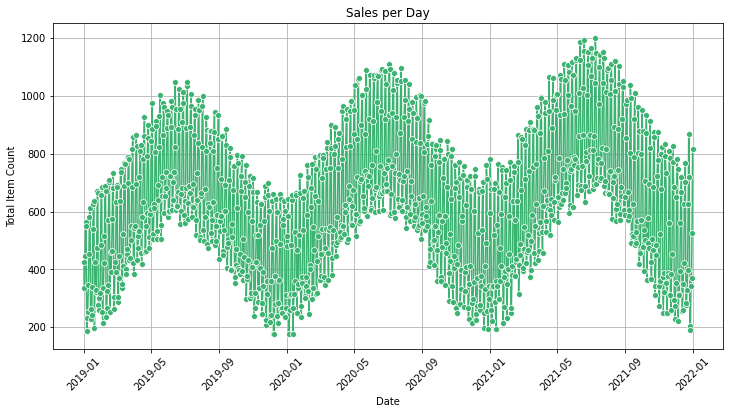

In [ ]:
# Plot a graph to view sum of item_count at a date level.

daily_sales = data.groupby('date')['item_count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='item_count', data=daily_sales, marker='o', color='mediumseagreen')

plt.xlabel('Date')
plt.ylabel('Total Item Count')
plt.title('Sales per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## What are the sales values across different days of the week?

In [ ]:
data['weekday'] = data.date.dt.day_name()

In [ ]:
import calendar
day_names = list(calendar.day_name)

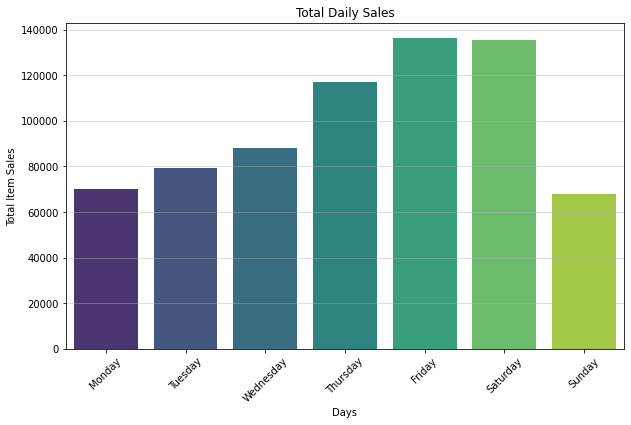

In [ ]:
# Plot the sales data across the different days of the week. (ex: Monday, Tuesday, etc.)

weekly_sales = data.groupby('weekday')['item_count'].sum().reindex(day_names)

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')

plt.xlabel("Days")
plt.ylabel("Total Item Sales")
plt.title("Total Daily Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

## Are there any specific observations for sales data for different months of the year?

In [ ]:
data['month_name'] = data.date.dt.month_name()

In [ ]:
months = list(calendar.month_name)[1:]

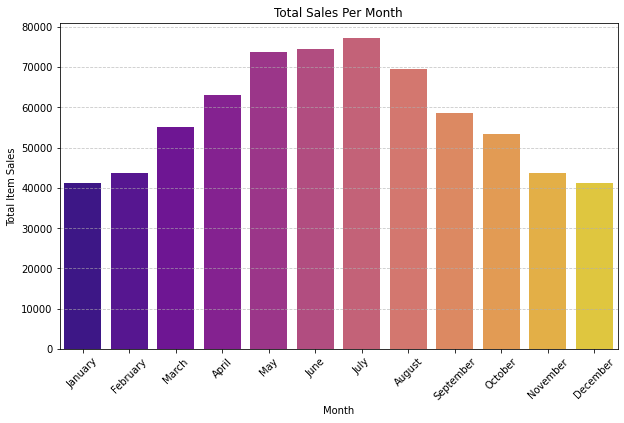

In [ ]:
# Plot the sales data at a month level

monthly_sales = data.groupby('month_name')['item_count'].sum().reindex(months)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='plasma')

plt.xlabel("Month")
plt.ylabel("Total Item Sales")
plt.title("Total Sales Per Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Observe the distribution of sales across different quarters averaged over years. Do you find any pattern in sales there?


In [ ]:
data['quarter'] = data.date.dt.quarter

In [ ]:
data

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name,weekday,month_name,quarter
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,Tuesday,January,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,Tuesday,January,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,Tuesday,January,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,Tuesday,January,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,Tuesday,January,1
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,49,1.39,0.0,3,Awesome Smoothy,78,Sweet Shack,Friday,December,4
109596,2021-12-31,52,5.68,0.0,3,Original Sweet Milky Soft Drink,535,Sweet Shack,Friday,December,4
109597,2021-12-31,77,7.70,0.0,3,Blue Ribbon Frozen Milky Cake,636,Sweet Shack,Friday,December,4
109598,2021-12-31,81,5.11,0.0,3,Fantastic Milky Smoothy,383,Sweet Shack,Friday,December,4


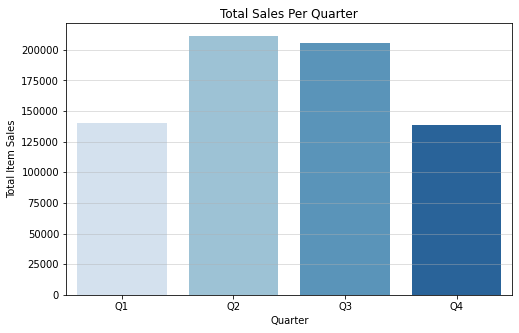

In [ ]:
# Plot the sales data at the quarter level

quarterly_sales = data.groupby('quarter')['item_count'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette='Blues')

plt.xlabel("Quarter")
plt.ylabel("Total Item Sales")
plt.title("Total Sales Per Quarter")
plt.xticks([0, 1, 2, 3], ["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

In [ ]:
data['year'] = data.date.dt.year

In [ ]:
data['quart-year'] = "Q" + data.quarter.astype(str) + "-" + data.year.astype(str)

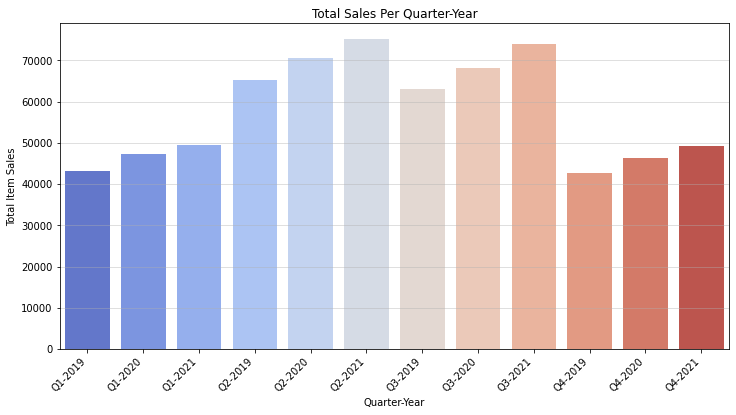

In [ ]:
# Plot the sales data at a quarter and year level

quarterly_sales = data.groupby('quart-year')['item_count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='quart-year', y='item_count', data=quarterly_sales, palette='coolwarm')

plt.xlabel("Quarter-Year")
plt.ylabel("Total Item Sales")
plt.title("Total Sales Per Quarter-Year")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

## How are the different restaurants performing? Which restaurant had the most sales? Also study the sales for each restaurant across different years months and days.


In [ ]:
data.groupby('store_id')[['item_count']].sum()

,item_count
store_id,
1,687527.0
2,1305.0
3,1736.0
4,1106.0
5,1310.0
6,1803.0


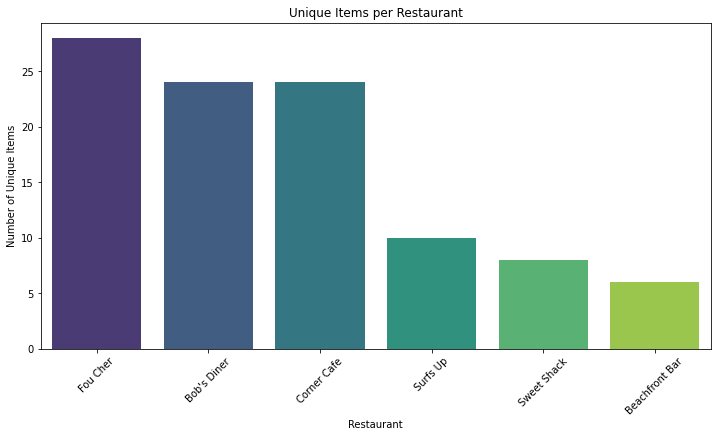

In [ ]:
# Plot the number of unique items in each restaurant.

unique_items_per_restaurant = data.groupby('restaurant_name')['item_id'].nunique().reset_index()
unique_items_per_restaurant = unique_items_per_restaurant.sort_values(by='item_id', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_name', y='item_id', data=unique_items_per_restaurant, palette='viridis')

plt.xlabel("Restaurant")
plt.ylabel("Number of Unique Items")
plt.title("Unique Items per Restaurant")
plt.xticks(rotation=45)
plt.show()

## restaurant level sales

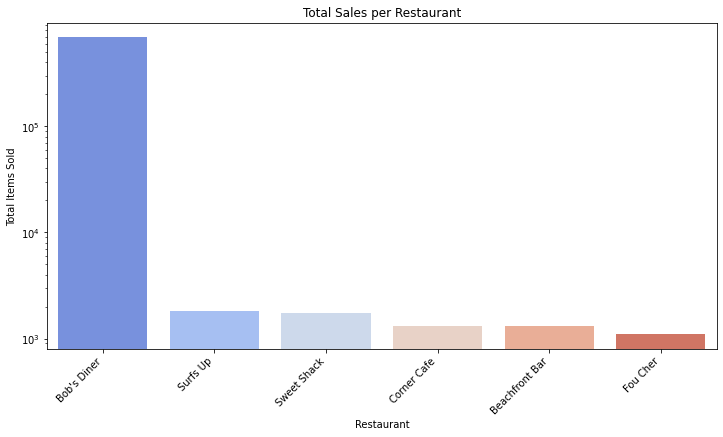

In [ ]:
# Plot the sales data for each restaurant

restaurant_sales = data.groupby('restaurant_name', as_index=False)['item_count'].sum().sort_values(by='item_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_name', y='item_count', data=restaurant_sales, palette='coolwarm')

plt.xlabel("Restaurant")
plt.ylabel("Total Items Sold")
plt.title("Total Sales per Restaurant")
plt.yscale('log')
plt.xticks(rotation=45, ha="right")
plt.show()

# year wise for each restaurant

In [ ]:
plot_data = data.pivot_table(index = 'quart-year', columns = 'store_id',values = 'item_count', aggfunc = 'sum')

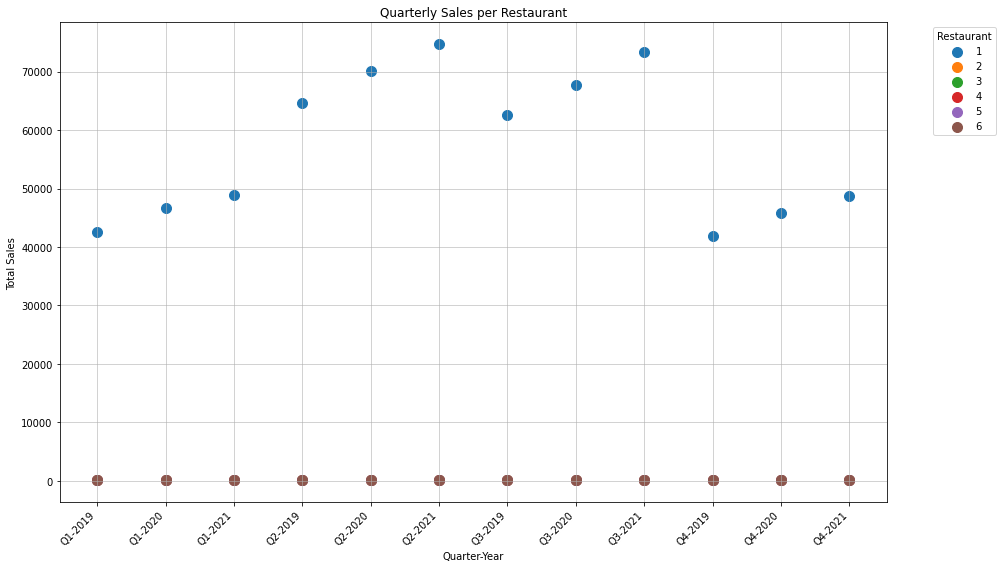

In [ ]:
# Plot the sales data for each restaurant at a quarter and year level
plt.figure(figsize=(14, 8))
for restaurant in plot_data.columns:
    plt.scatter(plot_data.index, plot_data[restaurant], label=restaurant, s=100)

plt.xlabel("Quarter-Year")
plt.ylabel("Total Sales")
plt.title("Quarterly Sales per Restaurant")
plt.xticks(rotation=45, ha="right")
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

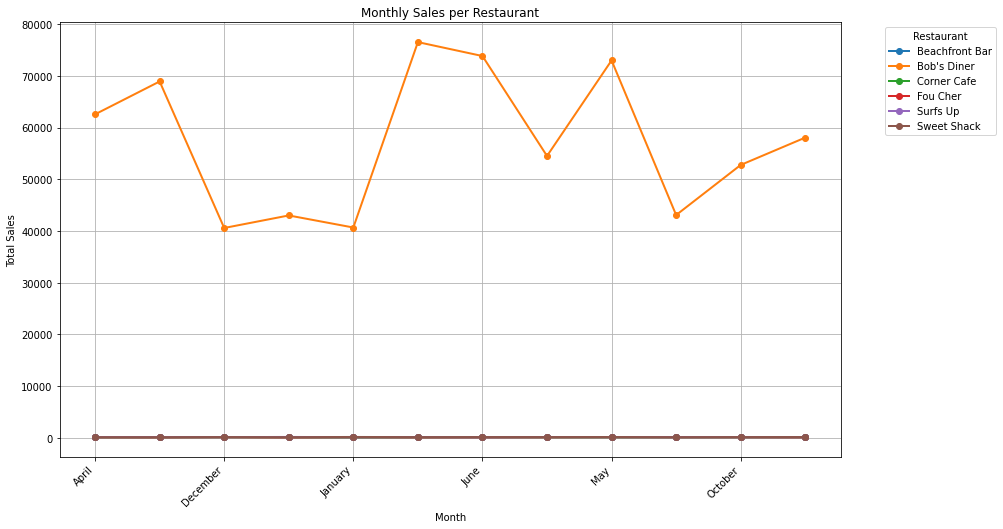

In [ ]:
monthly_sales = data.pivot_table(index='month_name', columns='restaurant_name', values='item_count', aggfunc='sum')

plt.figure(figsize=(14, 8))
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6, ax=plt.gca())

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales per Restaurant")
plt.xticks(rotation=45, ha="right")
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

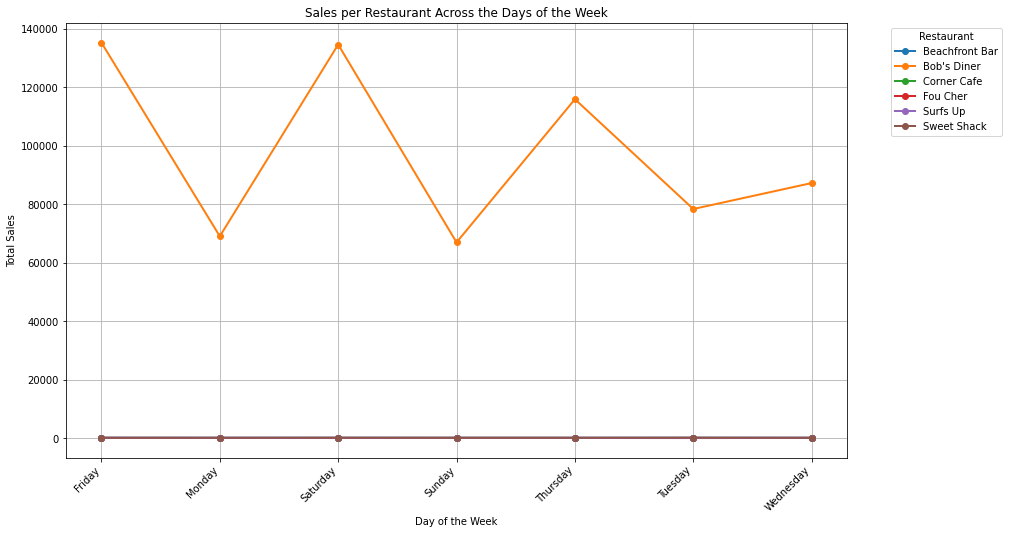

In [ ]:
# plot the sales data for each restaurant across the days of the week.

weekday_sales = data.pivot_table(index='weekday', columns='restaurant_name', values='item_count', aggfunc='sum')

plt.figure(figsize=(14, 8))
weekday_sales.plot(kind='line', marker='o', linewidth=2, markersize=6, ax=plt.gca())

plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Sales per Restaurant Across the Days of the Week")
plt.xticks(rotation=45, ha="right")
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

# Which are the most popular items (overall) and at which restaurant are they being sold? Also, find out the most popular item at each restaurant


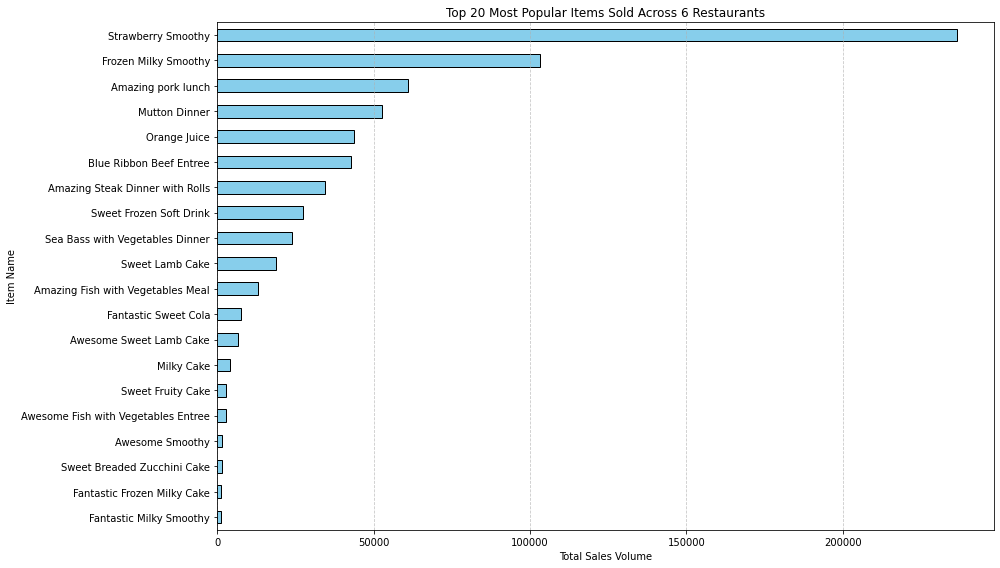

In [ ]:
# Plot the sales volume of the most popular items sold across the 6 restaurants (desceding order of sales volume)

top_items = data.groupby('item_name')['item_count'].sum().sort_values(ascending=False)

top_n = 20
top_items = top_items.head(top_n)

plt.figure(figsize=(14, 8))
top_items.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Total Sales Volume")
plt.ylabel("Item Name")
plt.title(f"Top {top_n} Most Popular Items Sold Across 6 Restaurants")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
count_data = data.pivot_table(index = 'item_id', columns = 'store_id',values = 'item_count', aggfunc = 'sum', fill_value = 0 )
item_ids = count_data.index[count_data.values.argmax(axis = 0)]

## popular items restaurant wise

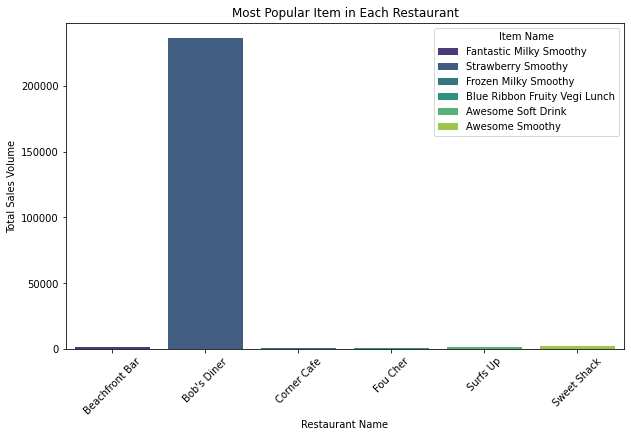

In [ ]:
#Plot the most popular item for each restaurant


popular_items = data.groupby(['restaurant_name', 'item_id'])['item_count'].sum().reset_index()

most_popular = popular_items.loc[popular_items.groupby('restaurant_name')['item_count'].idxmax()]

most_popular = most_popular.merge(items[['id', 'name']], left_on='item_id', right_on='id', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(data=most_popular, x='restaurant_name', y='item_count', hue='name', dodge=False, palette='viridis')

plt.xlabel('Restaurant Name')
plt.ylabel('Total Sales Volume')
plt.title('Most Popular Item in Each Restaurant')
plt.xticks(rotation=45)
plt.legend(title='Item Name')
plt.show()

# Is the store making the most sales in terms of count also making most money averaged for a day?


In [ ]:
# display a table to find the total sales volume for each restaurant
restaurant_sales = data.groupby('restaurant_name')['item_count'].sum().reset_index()
restaurant_sales.columns = ['Restaurant', 'Total Sales Volume']

print(restaurant_sales)

       Restaurant  Total Sales Volume
0  Beachfront Bar              1305.0
1     Bob's Diner            687527.0
2     Corner Cafe              1310.0
3        Fou Cher              1106.0
4        Surfs Up              1803.0
5     Sweet Shack              1736.0


In [ ]:
# Create a pivot to see the total sales volume for each restaurant for each year.
sales_pivot = data.pivot_table(index='restaurant_name', columns='year', values='item_count', aggfunc='sum', fill_value=0)

print(sales_pivot)

year               2019    2020    2021
restaurant_name                        
Beachfront Bar      439     437     429
Bob's Diner      211799  230191  245537
Corner Cafe         423     415     472
Fou Cher            392     357     357
Surfs Up            594     627     582
Sweet Shack         590     554     592


In [ ]:
# Create a sales amount column using the item count and price
data['sales_amnt'] = data['item_count'] * data['price']

print(data[['restaurant_name', 'item_name', 'item_count', 'price', 'sales_amnt']])

       restaurant_name                        item_name  item_count  price  \
0          Bob's Diner                Sweet Fruity Cake         2.0  29.22   
1          Bob's Diner  Amazing Steak Dinner with Rolls        22.0  26.42   
2          Bob's Diner             Fantastic Sweet Cola         7.0   4.87   
3          Bob's Diner          Sweet Frozen Soft Drink        12.0   4.18   
4          Bob's Diner             Frozen Milky Smoothy       136.0   3.21   
...                ...                              ...         ...    ...   
109595     Sweet Shack                  Awesome Smoothy         0.0   1.39   
109596     Sweet Shack  Original Sweet Milky Soft Drink         0.0   5.68   
109597     Sweet Shack    Blue Ribbon Frozen Milky Cake         0.0   7.70   
109598     Sweet Shack          Fantastic Milky Smoothy         0.0   5.11   
109599     Sweet Shack              Original Milky Cake         0.0   6.50   

        sales_amnt  
0            58.44  
1           581.24  


In [ ]:
# create a pivot table to display the sales amount for each restaurant for each year.
sales_amnt = data.pivot_table(index='restaurant_name', columns='year', values='sales_amnt', aggfunc='sum', fill_value=0)

print(sales_amnt)

year                   2019        2020        2021
restaurant_name                                    
Beachfront Bar      1281.85     1267.21     1247.14
Bob's Diner      1849483.49  2112331.91  2375460.29
Corner Cafe         5292.93     5347.71     5910.79
Fou Cher            9698.80     8590.87     9595.70
Surfs Up            5132.65     5314.43     5204.41
Sweet Shack          872.59      828.65      877.03


In [ ]:
count_order = data.pivot_table(index = 'store_id',  values = 'sales_amnt', aggfunc = 'sum').squeeze()
count_order_rest = count_order.sort_values(ascending = False).index

In [ ]:
sales_order = data.pivot_table(index = 'store_id',  values = 'item_count', aggfunc = 'sum').squeeze()
sales_order_rest = sales_order.sort_values(ascending = False).index

In [ ]:
restaurants

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


## Restaurant id 1 - Bob's Diner has disproportionate amoujnts of data.  We will leave it out for this analysis to understand whether the number and sales values match for other restaurants.

In [ ]:
count_order

store_id
1    6337275.69
2       3796.20
3       2578.27
4      27885.37
5      16551.43
6      15651.49
Name: sales_amnt, dtype: float64

In [ ]:
restaurants.set_index('id').loc[count_order_rest]

,name
store_id,
1,Bob's Diner
4,Fou Cher
5,Corner Cafe
6,Surfs Up
2,Beachfront Bar
3,Sweet Shack


In [ ]:
restaurants.set_index('id').loc[sales_order_rest]

,name
store_id,
1,Bob's Diner
6,Surfs Up
3,Sweet Shack
5,Corner Cafe
2,Beachfront Bar
4,Fou Cher


### Observations:
Which restaurant has the highest sales volume? Which restaurant has the highest sales amount? Can you draw any other insights from the two datatables above?
- Record your observations here.

# Which are the costliest item at each of the restaurants and what are their calorie counts?

In [ ]:
# Display the item with the highest unit price from the items table
highest_cost_item = items.loc[items['cost'].idxmax()]

print(f"Item with the highest cost: {highest_cost_item['name']} with a cost of {highest_cost_item['cost']}")

Item with the highest cost: Blue Ribbon Fruity Vegi Lunch with a cost of 53.98


In [ ]:
# List the 5 most expensive items in the items table.
top_5_expensive_items = items.sort_values(by='cost', ascending=False).head(5)

print(top_5_expensive_items[['name', 'cost']])

                                                 name   cost
79                      Blue Ribbon Fruity Vegi Lunch  53.98
2                                   Sweet Fruity Cake  29.22
55                    Sea Bass with Vegetables Dinner  28.75
96  Original Fruity Cod with Bread and Vegetables ...  28.65
33                                  Sweet Savory Cake  27.47


##  max and min cost of items sold at each restaurant

In [ ]:
# Display the lowest and highest unit price for each restaurant. Also, display the average cost of a dish at each restaurant.

restaurant_price_stats = items.groupby('store_id').agg(
    lowest_price=('cost', 'min'),
    highest_price=('cost', 'max'),
    avg_cost=('cost', 'mean')
).reset_index()

restaurant_price_stats = restaurant_price_stats.merge(restaurants[['id', 'name']], left_on='store_id', right_on='id', how='left')
restaurant_price_stats = restaurant_price_stats[['name', 'lowest_price', 'highest_price', 'avg_cost']]
restaurant_price_stats.columns = ['Restaurant', 'Lowest Price', 'Highest Price', 'Average Cost']

print(restaurant_price_stats)

       Restaurant  Lowest Price  Highest Price  Average Cost
0     Bob's Diner          2.89          29.22     12.211667
1  Beachfront Bar          2.43           5.70      3.585000
2     Sweet Shack          1.39           7.70      5.276250
3        Fou Cher          3.23          53.98     12.819643
4     Corner Cafe          3.74          26.37     13.371667
5        Surfs Up          3.06          26.21     13.970000


## Develop a linear regression, random forest and XGBoost model to predict for the model with the given data. Compare and comment on the results obtained.
- Create required features for development of these models like day of the week, quarter of the year, month, year, day of the month etc.
- Use the last six months data as test data.
- Compute the RMSE values for each of the models to compare their performances.
- Also use these models to forecast for 1 year.


In [ ]:
data.date.describe()

/tmp/ipykernel_52/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                  109600
unique                   1096
top       2019-01-01 00:00:00
freq                      100
first     2019-01-01 00:00:00
last      2021-12-31 00:00:00
Name: date, dtype: object

In [ ]:
ts = data.groupby('date')[['item_count']].sum().squeeze()


In [ ]:
data.head()

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name,weekday,month_name,quarter,year,quart-year,sales_amnt
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,Tuesday,January,1,2019,Q1-2019,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,Tuesday,January,1,2019,Q1-2019,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,Tuesday,January,1,2019,Q1-2019,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,Tuesday,January,1,2019,Q1-2019,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,Tuesday,January,1,2019,Q1-2019,436.56


In [ ]:
time_series = data.groupby(['date']).agg({'item_count':'sum', 'weekday': lambda x :x.unique()[0],
                            'quarter' : lambda x :x.unique()[0], 'year':lambda x :x.unique()[0],
                            'month_name' : lambda x :x.unique()[0],
                            'year':lambda x :x.unique()[0]})

# adding some more features : day of the year, day of the month and week of the year

In [ ]:
time_series

,item_count,weekday,quarter,year,month_name
date,,,,,
2019-01-01,427.0,Tuesday,1,2019,January
2019-01-02,337.0,Wednesday,1,2019,January
2019-01-03,445.0,Thursday,1,2019,January
2019-01-04,564.0,Friday,1,2019,January
2019-01-05,552.0,Saturday,1,2019,January
...,...,...,...,...,...
2021-12-27,192.0,Monday,4,2021,December
2021-12-28,344.0,Tuesday,4,2021,December
2021-12-29,371.0,Wednesday,4,2021,December


In [ ]:
# Add a few features to the time_series dataset: day of the year, day of the month, and week of the year

time_series['day_of_year'] = time_series.index.day_of_year
time_series['day_of_month'] = time_series.index.day
time_series['week_of_year'] = time_series.index.isocalendar().week.astype(int)

time_series.head()

,item_count,weekday,quarter,year,month_name,day_of_year,day_of_month,week_of_year
date,,,,,,,,
2019-01-01,427.0,Tuesday,1,2019,January,1,1,1
2019-01-02,337.0,Wednesday,1,2019,January,2,2,1
2019-01-03,445.0,Thursday,1,2019,January,3,3,1
2019-01-04,564.0,Friday,1,2019,January,4,4,1
2019-01-05,552.0,Saturday,1,2019,January,5,5,1


## convert the categorical to numeric using ordinal encoder. The input data is ordered in terms of weekday and month name.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
ord_enc = OrdinalEncoder(categories = [months, day_names])
ord_enc.fit(time_series[['month_name', 'weekday']])
time_series[['month_name', 'weekday']] = ord_enc.transform(time_series[['month_name', 'weekday']])

In [ ]:
time_series

,item_count,weekday,quarter,year,month_name,day_of_year,day_of_month,week_of_year
date,,,,,,,,
2019-01-01,427.0,1.0,1,2019,0.0,1,1,1
2019-01-02,337.0,2.0,1,2019,0.0,2,2,1
2019-01-03,445.0,3.0,1,2019,0.0,3,3,1
2019-01-04,564.0,4.0,1,2019,0.0,4,4,1
2019-01-05,552.0,5.0,1,2019,0.0,5,5,1
...,...,...,...,...,...,...,...,...
2021-12-27,192.0,0.0,4,2021,11.0,361,27,52
2021-12-28,344.0,1.0,4,2021,11.0,362,28,52
2021-12-29,371.0,2.0,4,2021,11.0,363,29,52


## Train Test Split

In [ ]:
# SPlit the input dataset into training and testing datasets. Add records before 2021-07-01 to the training dataset.
# All records on or after 2021-07-01 will be a part of the test dataset

train_data = time_series[time_series.index < '2021-07-01']
test_data = time_series[time_series.index >= '2021-07-01']

print(f"Training dataset size: {train_data.shape[0]}")
print(f"Testing dataset size: {test_data.shape[0]}")

Training dataset size: 912
Testing dataset size: 184


In [ ]:
y_var = 'item_count'
x_vars = time_series.drop(columns = 'item_count').columns

In [ ]:
# Split the dependent and independent variables for the training and testing datasets.

X_train = train_data[x_vars]
y_train = train_data[y_var]

X_test = test_data[x_vars]
y_test = test_data[y_var]

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 912 rows
Testing set size: 184 rows


## Linear Regression

In [ ]:
# create a linear regression object and fit the training data into the model

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ 3.42475930e+01  3.92039527e+00  6.73279038e+01  2.94968471e+03
 -9.69496840e+01  9.73992002e+01  1.10524019e+00]
Model Intercept: -135558.4110688007


In [ ]:
# Use the LR object to make predictions on the test data
y_pred = model.predict(X_test)

test_data['lr_predictions'] = y_pred

print("First few predictions:", y_pred[:5])

First few predictions: [805.18777854 839.88488762 874.5819967  909.27910579 705.34830428]


/tmp/ipykernel_52/711440818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['lr_predictions'] = y_pred


In [ ]:
test_data

,item_count,weekday,quarter,year,month_name,day_of_year,day_of_month,week_of_year,lr_predictions
date,,,,,,,,,
2021-07-01,1070.0,3.0,3,2021,6.0,182,1,26,805.187779
2021-07-02,1167.0,4.0,3,2021,6.0,183,2,26,839.884888
2021-07-03,1132.0,5.0,3,2021,6.0,184,3,26,874.581997
2021-07-04,677.0,6.0,3,2021,6.0,185,4,26,909.279106
2021-07-05,815.0,0.0,3,2021,6.0,186,5,27,705.348304
...,...,...,...,...,...,...,...,...,...
2021-12-27,192.0,0.0,4,2021,11.0,361,27,52,661.910949
2021-12-28,344.0,1.0,4,2021,11.0,362,28,52,696.608058
2021-12-29,371.0,2.0,4,2021,11.0,363,29,52,731.305168


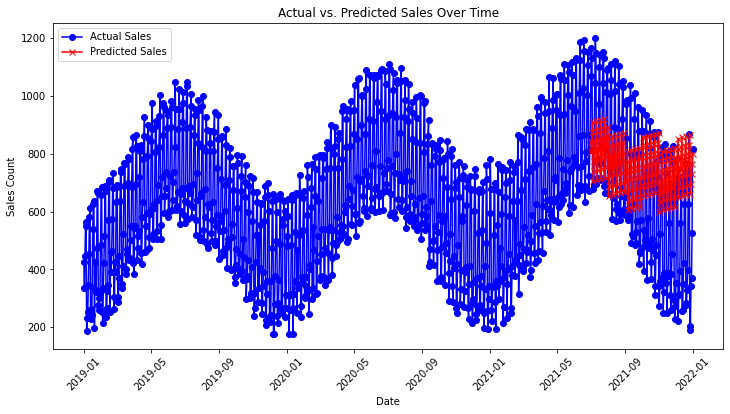

In [ ]:
# PLot the sales data for the test dataset and overlap the predicted values in a different color.

plt.figure(figsize=(12, 6))
plt.plot(time_series['item_count'], label="Actual Sales", color='blue', marker='o')

plt.plot(test_data['lr_predictions'], label="Predicted Sales", color='red', marker='x')

plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.title("Actual vs. Predicted Sales Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the RMSE, MAE, and R2_score for the linear regression model.

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2_score = r2_score(y_test, y_pred)

print(f"lr_rmse: {lr_rmse:.2f}")
print(f"lr_mae: {lr_mae:.2f}")
print(f"lr_r2_score Score: {lr_r2_score:.4f}")

lr_rmse: 244.21
lr_mae: 196.04
lr_r2_score Score: 0.0765


In [ ]:
results = pd.DataFrame([lr_rmse, lr_mae,lr_r2_score*100], index = ['RMSE', 'MAE', 'R2_Score'], columns = ['Linear Regression']).round(2)
results

,Linear Regression
RMSE,244.21
MAE,196.04
R2_Score,7.65


# Random Forest

In [ ]:
# Create a random forest model object and fit the train dataset into the model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Use the RF object to make predictions using the test data.

rf_predictions = rf_model.predict(X_test)

test_data['rf_predictions'] = rf_predictions
print("First few predictions:", rf_predictions[:10])

First few predictions: [ 991.31 1141.31 1162.99  626.95  673.38  787.7   829.25  998.05 1138.72
 1161.44]


/tmp/ipykernel_52/4274992546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['rf_predictions'] = rf_predictions


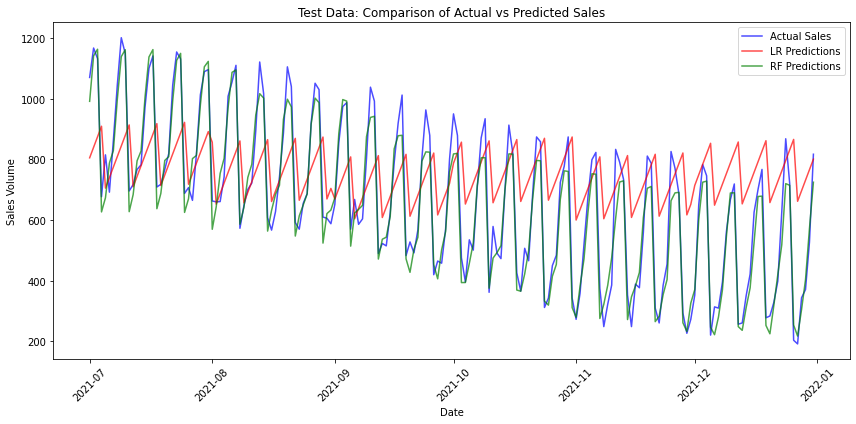

In [ ]:
# Plot the sales data of the test dataset and overlap the predictions of the Linear Regression and Random Forest models to compare. Use different colors to help differentiate the data.

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales', color='blue', alpha=0.7)

plt.plot(test_data['lr_predictions'], label='LR Predictions', color='red', alpha=0.7)

plt.plot(test_data['rf_predictions'], label='RF Predictions', color='green', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Test Data: Comparison of Actual vs Predicted Sales')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Calculate the RMSE, MAE, and R2_score for the random forest model

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

rf_mae = mean_absolute_error(y_test, rf_predictions)

rf_r2_score = r2_score(y_test, rf_predictions)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R²: {rf_r2_score}")

Random Forest RMSE: 60.341997852998745
Random Forest MAE: 47.88711956521739
Random Forest R²: 0.9436169213910589


In [ ]:
results['Random Forest'] = [rf_rmse,rf_mae,rf_r2_score*100]
results.round(2)

,Linear Regression,Random Forest
RMSE,244.21,60.34
MAE,196.04,47.89
R2_Score,7.65,94.36


## XGBoost

In [ ]:
# BUild an XGBoost and fit the training data into the model

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


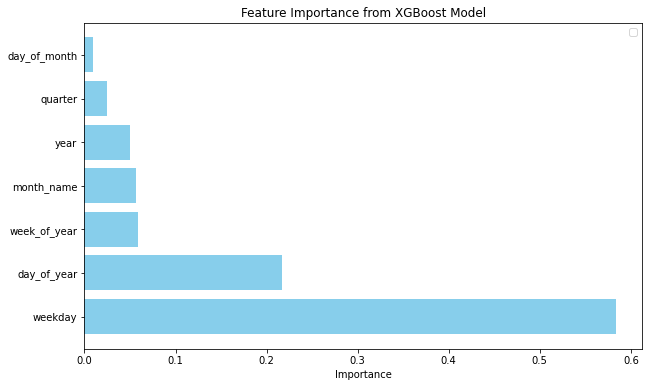

In [ ]:
# Create a dataframe to store the feature importance output from the XGB model
# Plot the features and their importance

feature_importance = xgb_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from XGBoost Model')
plt.legend()

plt.show()

In [ ]:
# Make predictions using the test data

xgb_predictions = xgb_model.predict(X_test)
print(f"First few predictions: {xgb_predictions[:5]}")

test_data['xgb_predictions'] = xgb_predictions

First few predictions: [1017.8893  1141.3785  1157.0544   653.96533  687.2638 ]


/tmp/ipykernel_52/609520291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['xgb_predictions'] = xgb_predictions


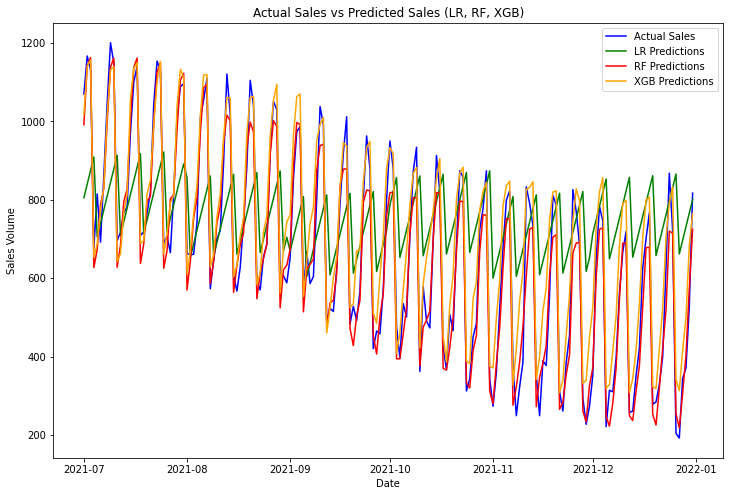

In [ ]:
# Plot the test sales data and compare with the linear regression, random forest, and XGB predictions.

plt.figure(figsize=(12, 8))

plt.plot(y_test, label='Actual Sales', color='blue')

plt.plot(test_data['lr_predictions'], label='LR Predictions', color='green')

plt.plot(test_data['rf_predictions'], label='RF Predictions', color='red')

plt.plot(test_data['xgb_predictions'], label='XGB Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Actual Sales vs Predicted Sales (LR, RF, XGB)')
plt.legend()

plt.show()

In [ ]:
# Calculate the RMSE, MAE, and R2_score for the XGB Boost model

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2_score = r2_score(y_test, xgb_predictions)

print(f"XGBoost Model RMSE: {xgb_rmse}")
print(f"XGBoost Model MAE: {xgb_mae}")
print(f"XGBoost Model R2 Score: {xgb_r2_score}")

XGBoost Model RMSE: 85.82234380119007
XGBoost Model MAE: 69.25085979959239
XGBoost Model R2 Score: 0.8859460955931001


In [ ]:
results['XGBoost'] = [xgb_rmse,xgb_mae,xgb_r2_score*100]
results = results.round(2)

In [ ]:
results

,Linear Regression,Random Forest,XGBoost
RMSE,244.21,60.34,85.82
MAE,196.04,47.89,69.25
R2_Score,7.65,94.36,88.59


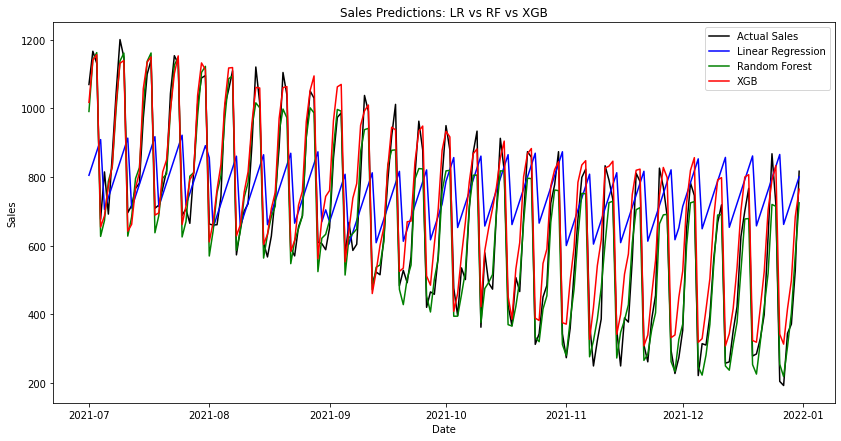

In [ ]:
# PLot the predicted sales data to compare the Linear Regression, Random Forest, and XGB models

plt.figure(figsize=(14, 7))

plt.plot(y_test.index, y_test, label="Actual Sales", color='black')

plt.plot(test_data['lr_predictions'], label="Linear Regression", color='blue')

plt.plot(test_data['rf_predictions'], label="Random Forest", color='green')

plt.plot(test_data['xgb_predictions'], label="XGB", color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Predictions: LR vs RF vs XGB')

plt.legend()

plt.show()

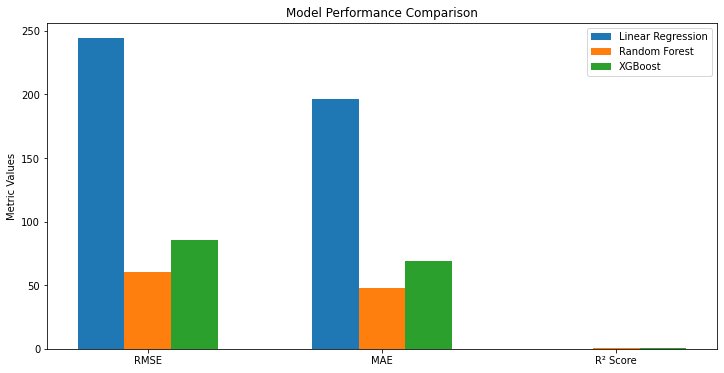

In [ ]:
# Plot the RMSE, MAE, and R2_score for the three models

metrics = {
    "Linear Regression": [lr_rmse, lr_mae, lr_r2_score],
    "Random Forest": [rf_rmse, rf_mae, rf_r2_score],
    "XGBoost": [xgb_rmse, xgb_mae, xgb_r2_score]
}

metrics_array = np.array(list(metrics.values()))

metric_labels = ["RMSE", "MAE", "R² Score"]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(metric_labels))

for i, (model, values) in enumerate(metrics.items()):
    ax.bar(x + i * bar_width, values, width=bar_width, label=model)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(metric_labels)
ax.set_ylabel("Metric Values")
ax.set_title("Model Performance Comparison")
ax.legend()

plt.show()

In [ ]:
results

,Linear Regression,Random Forest,XGBoost
RMSE,244.21,60.34,85.82
MAE,196.04,47.89,69.25
R2_Score,7.65,94.36,88.59


## Observations:
Which model is the best to use for forecasting?
- Record your observations here.

In [ ]:
time_series.index.max()

Timestamp('2021-12-31 00:00:00')

In [ ]:
future_predictors = pd.DataFrame(pd.date_range(start="2022-01-01", end="2022-12-31"), columns=['date'])
future_predictors.index = pd.to_datetime(future_predictors.date)


In [ ]:
X_train.columns

Index(['weekday', 'quarter', 'year', 'month_name', 'day_of_year',
       'day_of_month', 'week_of_year'],
      dtype='object')

In [ ]:
future_predictors.date.dt.isocalendar().week

date
2022-01-01    52
2022-01-02    52
2022-01-03     1
2022-01-04     1
2022-01-05     1
              ..
2022-12-27    52
2022-12-28    52
2022-12-29    52
2022-12-30    52
2022-12-31    52
Name: week, Length: 365, dtype: UInt32

In [ ]:
future_predictors['weekday'] = future_predictors.date.dt.day_name()
future_predictors['quarter'] = future_predictors.date.dt.quarter
future_predictors['year'] = future_predictors.date.dt.year
future_predictors['month_name'] = future_predictors.date.dt.month_name()
future_predictors['day_of_year'] = future_predictors.date.dt.day_of_year
future_predictors['day_of_month'] = future_predictors.date.dt.day
future_predictors['week_of_year'] = future_predictors.date.dt.isocalendar().week


In [ ]:
future_predictors.head(2)

,date,weekday,quarter,year,month_name,day_of_year,day_of_month,week_of_year
date,,,,,,,,
2022-01-01,2022-01-01,Saturday,1,2022,January,1,1,52
2022-01-02,2022-01-02,Sunday,1,2022,January,2,2,52


In [ ]:
future_predictors[['month_name', 'weekday']] = ord_enc.transform(future_predictors[['month_name', 'weekday']])

In [ ]:
X_train.columns

Index(['weekday', 'quarter', 'year', 'month_name', 'day_of_year',
       'day_of_month', 'week_of_year'],
      dtype='object')

In [ ]:
future_predictors

,date,weekday,quarter,year,month_name,day_of_year,day_of_month,week_of_year
date,,,,,,,,
2022-01-01,2022-01-01,5.0,1,2022,0.0,1,1,52
2022-01-02,2022-01-02,6.0,1,2022,0.0,2,2,52
2022-01-03,2022-01-03,0.0,1,2022,0.0,3,3,1
2022-01-04,2022-01-04,1.0,1,2022,0.0,4,4,1
2022-01-05,2022-01-05,2.0,1,2022,0.0,5,5,1
...,...,...,...,...,...,...,...,...
2022-12-27,2022-12-27,1.0,4,2022,11.0,361,27,52
2022-12-28,2022-12-28,2.0,4,2022,11.0,362,28,52
2022-12-29,2022-12-29,3.0,4,2022,11.0,363,29,52


In [ ]:
future_predictors['predictions'] = rf_model.predict(future_predictors[X_train.columns])

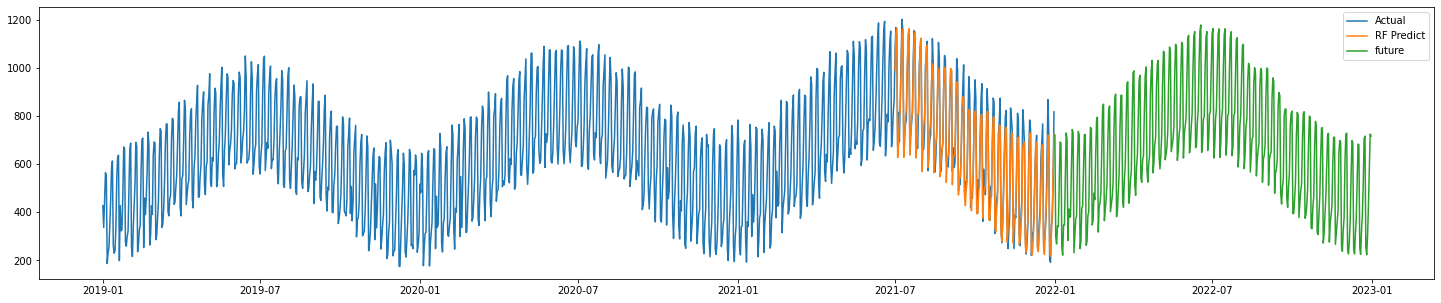

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test_data.rf_predictions, label = "RF Predict")
plt.plot(future_predictors.predictions, label = "future")
plt.legend()
plt.show()

# Time Series Modelling :
- Plot seasonality, trend, and irregular components over time for the sales data.
- Based on trend and seasonality, choose an appropriate exponential smoothing method to forecast using last six months of the data as validation set.
- Perform augmented Dickey-Fuller test (ADF) to check for stationarity for time series.
- Look at the ACF and PACF plots and strategize for ARIMA modeling. Find appropriate values of p, d and q and forecast for next 3 months. For model validation, find out MAPE of 3 months.


In [ ]:
ts = time_series['item_count']

In [ ]:
ts

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [ ]:
train = ts[ts.index < '2021-07-01']
test = ts[ts.index >= '2021-07-01']

In [ ]:
decompose = seasonal_decompose(train)

In [ ]:
trend = decompose.trend
seasonality = decompose.seasonal
resid = decompose.resid

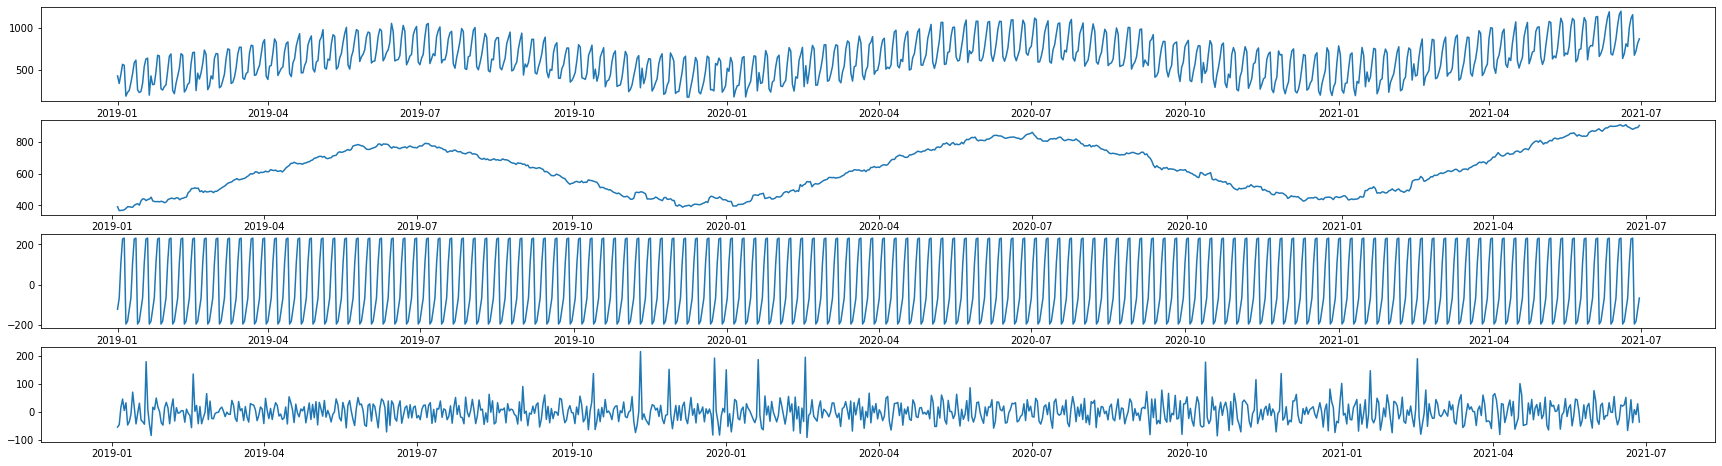

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (30,8 ))
ax[0].plot(train)
ax[1].plot(trend)
ax[2].plot(seasonality)
ax[3].plot(resid)
plt.show()

In [ ]:
ts

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [ ]:
model_final = ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
prediction = model_final.predict(start = '2021-07-01', end = '2021-12-31')

In [ ]:
mape_exp_smoothning = mean_absolute_percentage_error(y_true = test, y_pred = prediction )
print("MAPE for Exponential Smoothening : ", mape_exp_smoothning)

MAPE for Exponential Smoothening :  0.964917773672707


## function to check stationarity

In [ ]:
def test_stationarity(ts):
    # mean and variance for the series
    f , ax = plt.subplots(1,2, figsize = (25,5))
    ax[0].plot(ts, label = 'Original')

    # rolling stats
    rolling_mean = ts.rolling(window = 12).mean()
    rolling_std = ts.rolling(window = 12).std()

    ax[0].plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    ax[0].plot(rolling_std, color = 'black', label = 'Rolling STD')
    ax[0].legend(loc = 'best')

    # Adfuller test
    dftest = adfuller(ts)
    df = pd.Series(dftest[:4], index = ['Test Statistics', 'p-value', '# Lags Used', '# Obs used'])

    if (df['p-value'] >= 0.05):
        ax[1].annotate('Fail to Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Non Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    else :
        ax[1].annotate('Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Stationary'.center(35), xy = (0.25, 0.7), size = 25)

    c = 0.4
    for i in range(4):
        text = '{}    : {:.4f}'.format(df.index[i], df[i])
        ax[1].annotate(text, xy = (0.1, c), size = 15)
        c -= 0.1
    c = 0.4
    for i in dftest[4].keys():
        text = 'Critical Value {}    : {:.4f}'.format(i, dftest[4][i])
        ax[1].annotate(text, xy = (0.5, c), size = 15)
        c -= 0.1
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[1].axis('off')
    plt.show()

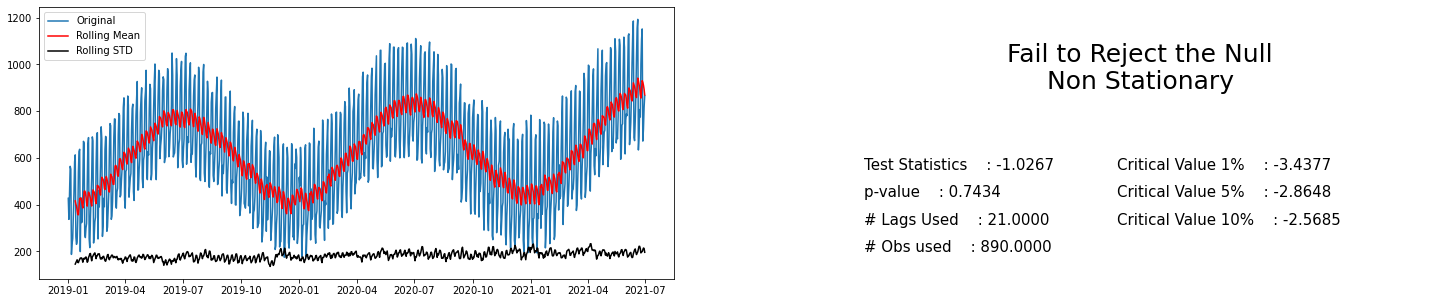

In [ ]:
test_stationarity(train)

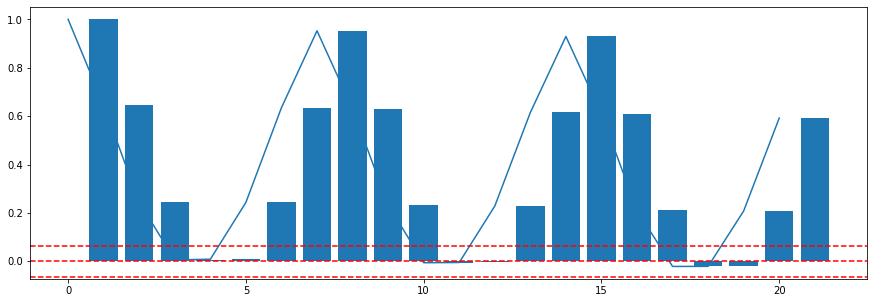

In [ ]:
lag_acf = acf(train, nlags = 20)
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_acf)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'red')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'red')
plt.show()

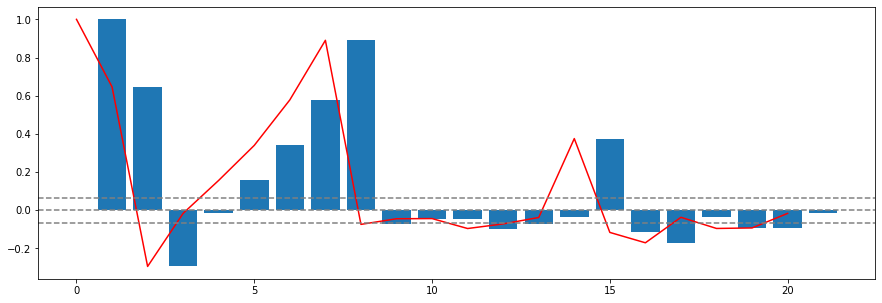

In [ ]:
lag_pacf = pacf(train, nlags = 20, method= 'ols')
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_pacf)
plt.plot(lag_pacf, color = 'red')
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.show()

# ACF : q term = 2
# PACF : p term = 5

## auto Arima

In [ ]:
model = auto_arima(train, trace = True )
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12034.577, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12167.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12165.198, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12162.682, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12165.088, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11826.313, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11829.106, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12121.427, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11639.755, Time=0.88 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11766.417, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11333.702, Time=1.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11419.205, Time=2.80 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11436.063, Time=2.43 sec
 ARIMA(3,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

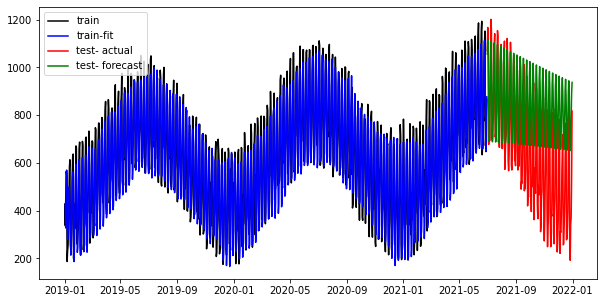

In [ ]:
fit = model.predict_in_sample(train)
forecast = model.predict(n_periods=len(test))
test.index

plt.figure(figsize = (10,5))
plt.plot(train, color = 'black', label = 'train')
plt.plot(fit[1:], color = 'blue', label = 'train-fit')
plt.plot(test, color = 'red', label = 'test- actual')
plt.plot(test.index, forecast,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

# MAPE

In [ ]:
mape_arima = mean_absolute_percentage_error(y_true = test, y_pred = forecast)
print("MAPE for ARIMA : ", mape_arima)

MAPE for ARIMA :  0.45318448550200185


# forecast for 3 months

In [ ]:
model = auto_arima(ts, trace = True )
model.fit(ts)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14333.447, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14667.307, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14663.301, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14659.656, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14665.311, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14260.139, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14265.433, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14613.060, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14033.049, Time=1.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14226.364, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13788.549, Time=1.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=13798.755, Time=1.46 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(1,1,5)(0,0,0)[0] interce

ARIMA(order=(2, 1, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
model.predict(n_periods = 3*30)

2022-01-01    613.495966
2022-01-02    362.669244
2022-01-03    218.597527
2022-01-04    225.327478
2022-01-05    394.278327
                 ...    
2022-03-27    315.528127
2022-03-28    214.524128
2022-03-29    217.843952
2022-03-30    320.989201
2022-03-31    444.779753
Freq: D, Length: 90, dtype: float64

# restaurant wise prediction using auto arima

In [ ]:
def arima_func(train, test):
  model = auto_arima(train )
  model.fit(train)
  pred_test = model.predict(n_periods  = len(test))
  mape_arima = mean_absolute_percentage_error(y_true = test, y_pred = pred_test)
  return mape_arima


In [ ]:
mape_results = {}
for rest in restaurants.id:
  ts = merged_data[merged_data.store_id == rest].groupby('date')['item_count'].sum()
  train = ts[ts.index < '01-07-2021']
  test = ts[ts.index >='01-07-2021']
  mape_results[rest] = arima_func(train,test)

In [ ]:
mape_results

{1: 0.39963943780585964,
 2: 1412818571072092.0,
 3: 1256181143760882.8,
 4: 1332794522197369.8,
 5: 1264220874069995.0,
 6: 1300516495321220.0}

# Forecasting using Deep Learning


In [ ]:
time_ser = data.groupby('date').agg({'sales_amnt': 'sum'})
time_ser

,sales_amnt
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


In [ ]:
train = time_ser[time_ser.index < '2021-07-01']
test = time_ser[time_ser.index >= '2021-07-01']

# data scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
# We're only using one feature in our time series
n_features = 1
length = 12

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

## fit model

In [ ]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/tmp/ipykernel_52/687208369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


Epoch 1/10
900/900 [==============================] - 7s 4ms/step - loss: 0.0267 - val_loss: 0.0140
Epoch 2/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 3/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 4/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 5/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0073 - val_loss: 0.0058
Epoch 6/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 7/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 8/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 9/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/10
900/900 [==============================] - 3s 3ms/step - loss: 0.0042 - val_loss: 0.0074

<AxesSubplot: >

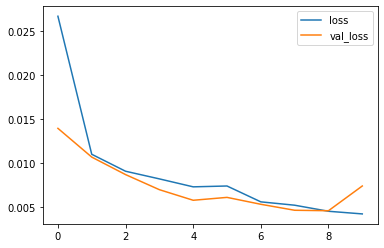

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


# inverse to get true predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/tmp/ipykernel_52/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,sales_amnt,Predictions
date,,
2021-07-01,10290.33,9824.559170
2021-07-02,11028.59,11530.546878
2021-07-03,10793.51,11522.372954
2021-07-04,6524.13,7178.504726
2021-07-05,7983.57,7299.243868
...,...,...
2021-12-27,1867.71,14746.508784
2021-12-28,3426.50,16870.452038
2021-12-29,3715.39,19386.348522


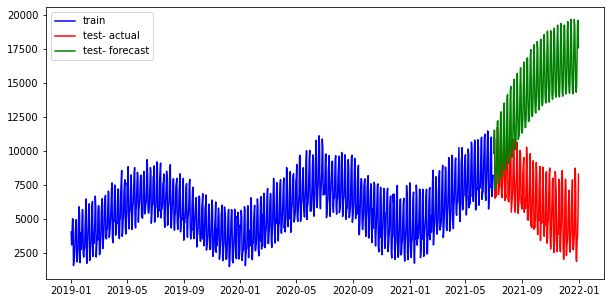

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'blue', label = 'train')
plt.plot(test.sales_amnt, color = 'red', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

<AxesSubplot: xlabel='date'>

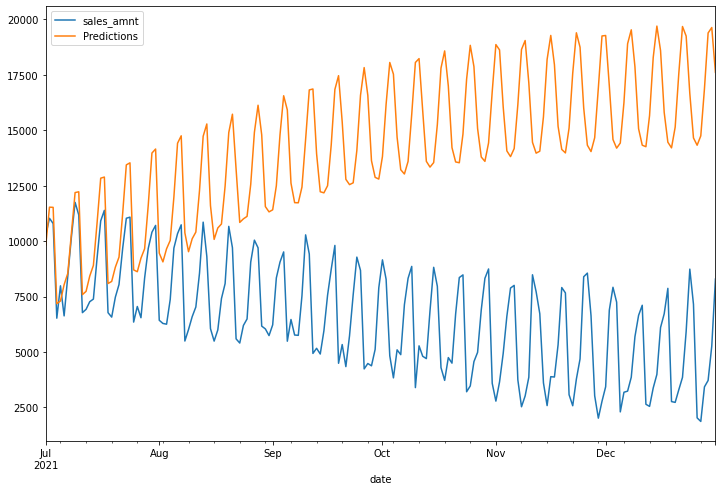

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
mape_dl = mean_absolute_percentage_error(y_true = test.sales_amnt, y_pred = test.Predictions)
print("MAPE for LSTM : ", mape_dl)

MAPE for LSTM :  1.7196937009866406


In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(time_ser)

In [ ]:
length = 3*30 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8


/tmp/ipykernel_52/2856022322.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


1006/1006 [==============================] - 18s 17ms/step - loss: 0.0375
Epoch 2/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0164
Epoch 3/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0092
Epoch 4/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0076
Epoch 5/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0064
Epoch 6/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0050
Epoch 7/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0042
Epoch 8/8
1006/1006 [==============================] - 17s 17ms/step - loss: 0.0042


In [ ]:
forecast = []
periods = 3*30

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast_dates = pd.date_range(start='2022-01-01 ',periods=3*30, freq = "D")

In [ ]:
forecast_data = pd.DataFrame(data=forecast,index=forecast_dates,
                           columns=['Forecast']).squeeze()

In [ ]:
forecast_data

2022-01-01    7304.980373
2022-01-02    2559.694499
2022-01-03    2524.763634
2022-01-04    3162.172767
2022-01-05    3974.803259
                 ...     
2022-03-27    2825.283734
2022-03-28    2591.508223
2022-03-29    3168.675429
2022-03-30    3917.679514
2022-03-31    5416.087425
Freq: D, Name: Forecast, Length: 90, dtype: float64

In [ ]:
time_ser

,sales_amnt
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


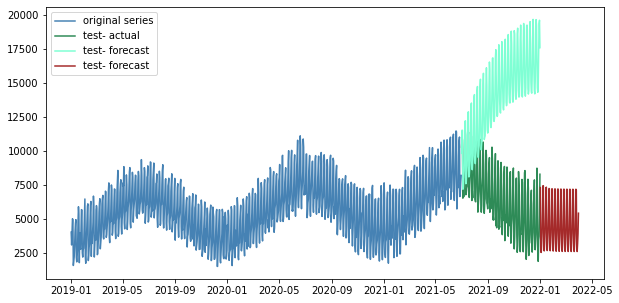

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train.index, train.sales_amnt, color = 'steelblue', label = 'original series')
plt.plot(test.index, test.sales_amnt,color = 'seagreen', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'aquamarine', label = 'test- forecast')
plt.plot(forecast_data.index, forecast_data.values, color = 'brown', label = 'test- forecast')
plt.legend()
plt.show()

In [ ]:
mape_arima, mape_dl, mape_exp_smoothning

(0.45318448550200185, 1.7196937009866406, 0.964917773672707)

In [ ]:
pd.DataFrame([mape_exp_smoothning, mape_arima, mape_dl ], index = ['Exponential Smoothening', 'ARIMA', 'LSTM'])

,0
Exponential Smoothening,0.964918
ARIMA,0.453184
LSTM,1.719694
